In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load and read data 
df=pd.read_csv(r"F:\Study\ICT Academy Kerela\Assignment - 3\train_loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# Check for duplicate values
df.duplicated().sum()

0

In [5]:
# Show the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Describe the data 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.skew()

C:\Users\aksha\AppData\Local\Temp\ipykernel_16168\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [8]:
df.loc[df.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [9]:
df.median()

C:\Users\aksha\AppData\Local\Temp\ipykernel_16168\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [10]:
# Calculate mode for each column
modes = df.mode().iloc[0]
modes

Loan_ID               LP001002
Gender                    Male
Married                    Yes
Dependents                   0
Education             Graduate
Self_Employed               No
ApplicantIncome         2500.0
CoapplicantIncome          0.0
LoanAmount               120.0
Loan_Amount_Term         360.0
Credit_History             1.0
Property_Area        Semiurban
Loan_Status                  Y
Name: 0, dtype: object

In [11]:
v={'Gender':'Male','Married':'Yes','Dependents':'0','Self_Employed':'No','LoanAmount':128.0,'Loan_Amount_Term':360.0,'Credit_History':1.0}

In [12]:
# Replace the Nan values
df.fillna(value=v,inplace=True)

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Skipping non-numeric column: Loan_ID
Skipping non-numeric column: Gender
Skipping non-numeric column: Married
Skipping non-numeric column: Dependents
Skipping non-numeric column: Education
Skipping non-numeric column: Self_Employed


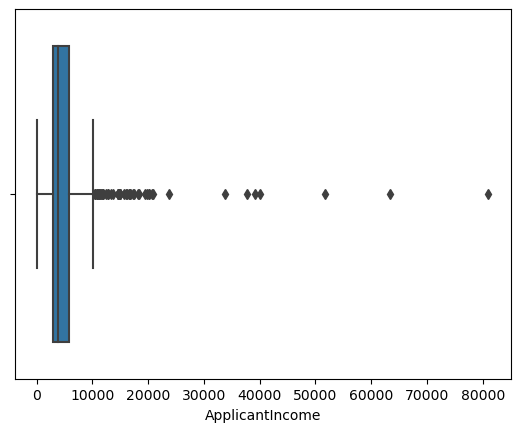

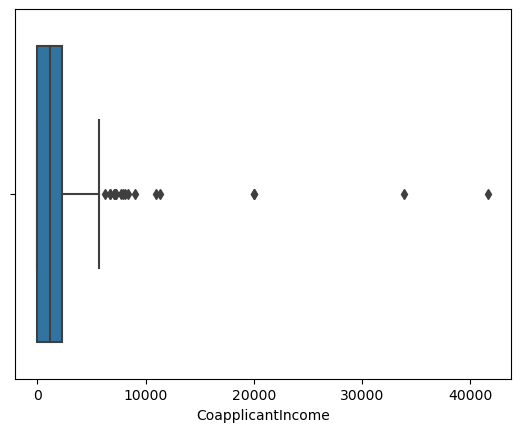

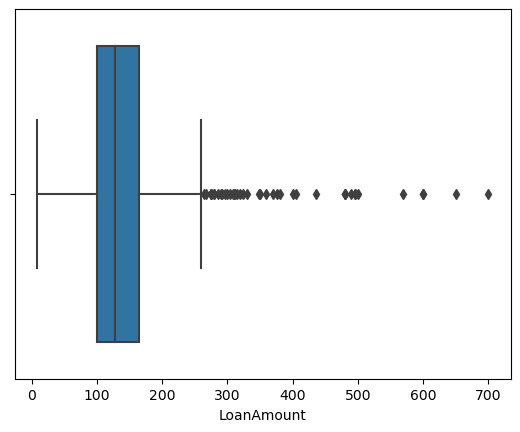

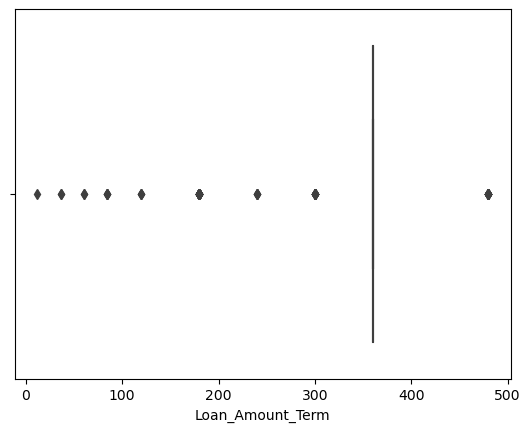

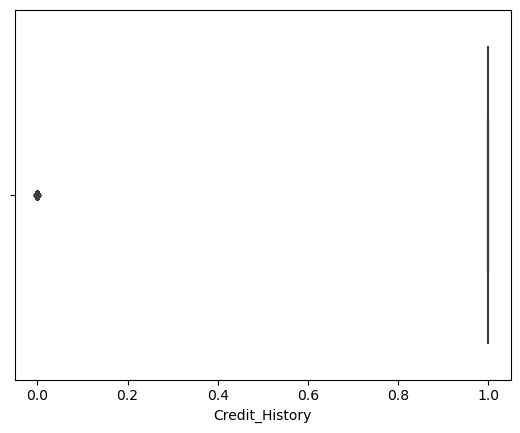

Skipping non-numeric column: Property_Area
Skipping non-numeric column: Loan_Status


In [14]:
# Generate a loop for draw box plot to identify if ourliers are presented in the data set
for i in df.columns:
    if pd.api.types.is_numeric_dtype(df[i]):
        sns.boxplot(x=df[i])
        plt.show()
    else:
        print(f"Skipping non-numeric column: {i}")


Skipping non-numeric column: Loan_ID
Skipping non-numeric column: Gender
Skipping non-numeric column: Married
Skipping non-numeric column: Dependents
Skipping non-numeric column: Education
Skipping non-numeric column: Self_Employed


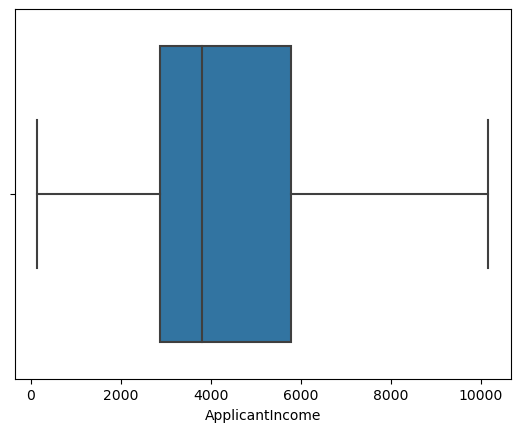

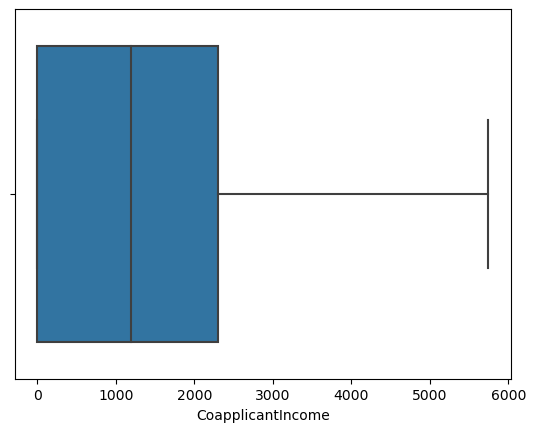

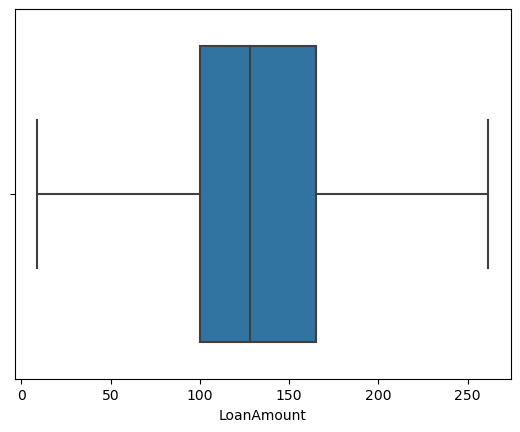

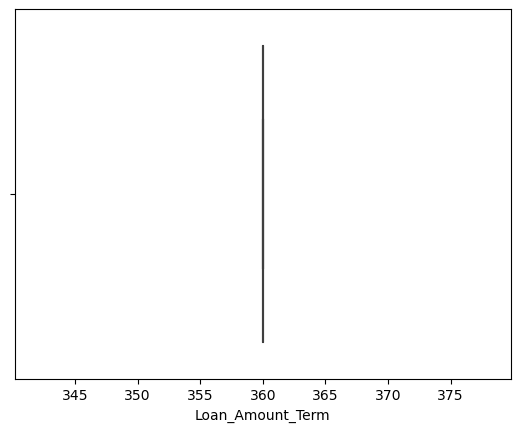

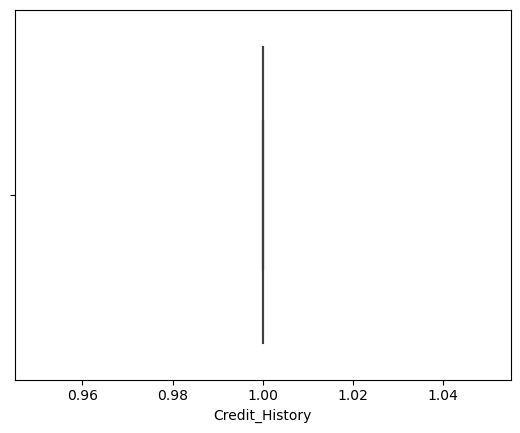

Skipping non-numeric column: Property_Area
Skipping non-numeric column: Loan_Status


In [15]:
for i in df.columns:
    if pd.api.types.is_numeric_dtype(df[i]):  # Check if the column is numeric
        Q1 = np.percentile(df[i], 25)  # Calculate 25th percentile
        Q3 = np.percentile(df[i], 75)  # Calculate 75th percentile
        IQR = Q3 - Q1  # Calculate Interquartile Range
        low = Q1 - 1.5 * IQR  # Calculate lower bound
        up = Q3 + 1.5 * IQR  # Calculate upper bound
        
        # Replace outliers with bounds
        df[i] = df[i].apply(lambda x: low if x < low else up if x > up else x)
        
        # Plot boxplot
        sns.boxplot(x=df[i])
        plt.show()
    else:
        print(f"Skipping non-numeric column: {i}")


In [16]:
# # Analyse and remove outlier from the object data type columns
# for col in df.columns:
#     if df[col].dtype == 'object':  # Check if the column is of object type
#         print(f"Analyzing column: {col}")
        
#         # Calculate frequency of each category
#         category_counts = df[col].value_counts()
#         print(category_counts)
        
#         # Calculate IQR for frequencies
#         Q1 = np.percentile(category_counts, 25)
#         Q3 = np.percentile(category_counts, 75)
#         IQR = Q3 - Q1
#         low = Q1 - 1.5 * IQR  # Lower bound
#         up = Q3 + 1.5 * IQR  # Upper bound
        
#         # Identify rare categories (frequencies outside the bounds)
#         rare_categories = category_counts[(category_counts < low) | (category_counts > up)].index
        
#         # Replace or remove rare categories
#         df[col] = df[col].apply(lambda x: 'Rare' if x in rare_categories else x)
        
#         # Optional: Plot the frequency distribution
#         sns.countplot(y=df[col], order=df[col].value_counts().index)
#         plt.show()


* The code provided does not remove rows or outliers directly. Instead, it replaces rare categories (determined by their frequency) with a placeholder value, such as 'Rare'. This approach handles the outliers but does not remove them from the dataset.

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# Using label encoding techinique change the data type of the object data type column
le=LabelEncoder()
df['Loan_ID']=le.fit_transform(df['Loan_ID'])
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [19]:
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Split the data set into train and test data. Here outcome column is considered as the target column 
x=df.drop(['Loan_Status'],axis=1).values
y=df['Loan_Status'].values

In [22]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3,random_state=8)
y_train

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,

## Logistic Regression 

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
# Evaluate the model and generate the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[  0  52]
 [  3 130]]


In [28]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.7027027027027027


# Bagging

## RandomForest 

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [31]:
# Train the model
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predict on the test set
y_pred = rf.predict(x_test)

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.6703


## Boosting 

## AdaBoost 

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [35]:
# Initialize the base learner (e.g., Decision Tree)
base_learner = DecisionTreeClassifier(max_depth=1)

In [36]:
# Initialize the AdaBoost classifier
adaboost = AdaBoostClassifier(base_estimator=base_learner, n_estimators=50, random_state=42)

In [37]:
# Train the model
adaboost.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [38]:
# Predict on the test set
y_pred = adaboost.predict(x_test)

In [39]:
# Evaluate the model
accuracy_score(y_test, y_pred)

0.6918918918918919

## XGBoost 

In [40]:
import xgboost as xgb

In [41]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(x_test)

In [42]:
# Evaluate the model
accuracy_score(y_test, y_pred)

0.6432432432432432

# Hyperparameter tuning

##  Grid Search 

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
# Define hyperparameters and their distributions
param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [45]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

In [46]:
# Fit the model
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50, 100, 150, 200])},
                   random_state=42, scoring='accuracy')

In [47]:
# Print the best hyperparameters and the best score
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20}
Best Score: 0.6504240766073872


In [48]:
# Evaluate on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.6972972972972973